# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
print(df.head(10))

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive


In [3]:
df.shape

(50000, 2)

# Mapping the sentiment to label

In [4]:
df['label'] = df['sentiment'].map({'positive' : 1, 'negative': 0})

In [5]:
df

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


# Dropping the label column

In [6]:
df.drop('sentiment', axis=1, inplace=True)

In [7]:
df

,review,label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


# Dropping the duplicate value

In [8]:
#droping duplicates

df = df.drop_duplicates()

In [9]:
df.shape

(49582, 2)

# Checking if any null value exist

In [10]:
df.isnull().sum()

review    0
label     0
dtype: int64

In [11]:
#checking the value counts
df['label'].value_counts()

1    24884
0    24698
Name: label, dtype: int64

# Checking if this contains any html tags

In [12]:
import re
for i in df['review'].values:
    if(len(re.findall('<.*?>', i))):
        print(i)
        break

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [13]:
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


# Loading the stop words

In [14]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
print(stop)

{'myself', 'me', 'out', 'that', 'where', 'aren', 'before', 'most', "wasn't", "you've", 'they', 'am', 'been', 'then', "wouldn't", "hadn't", 'only', "needn't", 'once', 'nor', 'have', 'ours', 'why', 'him', 'just', 'below', 'you', 'are', "you're", 'hers', 'ain', 'than', 'to', 'over', 'after', 'mightn', 'i', 'ourselves', 'under', 'not', 'needn', "shouldn't", 'both', 'weren', 'from', "weren't", "she's", "haven't", 'd', 'was', 'very', 'into', 'couldn', 'doesn', 'being', 'each', 'through', 'all', 'what', "couldn't", 'its', "doesn't", 'but', "didn't", 'hasn', 're', 'has', 'some', 'other', 'is', 'will', 'during', 'yourselves', 'shan', 'whom', "mustn't", 'his', 'because', 'my', 'on', 'while', "aren't", 'll', "shan't", 'yourself', 'in', 'does', 've', 'it', 'itself', 'himself', 'of', 'won', 'an', 't', 'your', 'y', "should've", "you'll", 'who', 'which', 'hadn', 'as', 'them', 'we', "that'll", 'ma', 'those', 'now', "mightn't", 'didn', 'down', 'their', 'she', 'did', 'the', 'further', "hasn't", 'mustn',

# Loading the stemmer

In [15]:
from nltk.stem import SnowballStemmer
sno = SnowballStemmer('english')

# Cleaning and preprocessing the data

In [16]:
str1 = ' '
#fil_words = []
str = ' '
final_string = []

for i in df['review'].values:
    fil_word = []
    sent = cleanhtml(i)
    for w in sent.split():
        for cleanedwords in cleanpunc(w).split():
            if((cleanedwords.isalpha()) and (len(cleanedwords) > 2)):
                if(cleanedwords.lower() not in stop):
                    s = (sno.stem((cleanedwords.lower())).encode('utf8'))
                    fil_word.append(s)
    
    str1 = b' '.join(fil_word)
    final_string.append(str1) 
                    

# Creating a colum in data frame of preprocessed data

In [17]:
df['cleanedtext'] = final_string

In [18]:
df

,review,label,cleanedtext
0,One of the other reviewers has mentioned that ...,1,b'one review mention watch episod youll hook r...
1,A wonderful little production. <br /><br />The...,1,b'wonder littl product film techniqu fashion g...
2,I thought this was a wonderful way to spend ti...,1,b'thought wonder way spend time hot summer wee...
3,Basically there's a family where a little boy ...,0,b'basic there famili littl boy jake think ther...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,b'petter mattei love time money visual stun fi...
...,...,...,...
49995,I thought this movie did a down right good job...,1,b'thought movi right good job wasnt creativ or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,b'bad plot bad dialogu bad act idiot direct an...
49997,I am a Catholic taught in parochial elementary...,0,b'cathol taught parochi elementari school nun ...
49998,I'm going to have to disagree with the previou...,0,b'go disagre previous comment side maltin one ...


# Visualizing the data using wordcloud

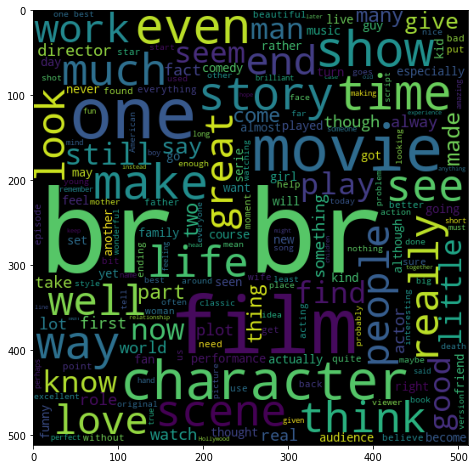

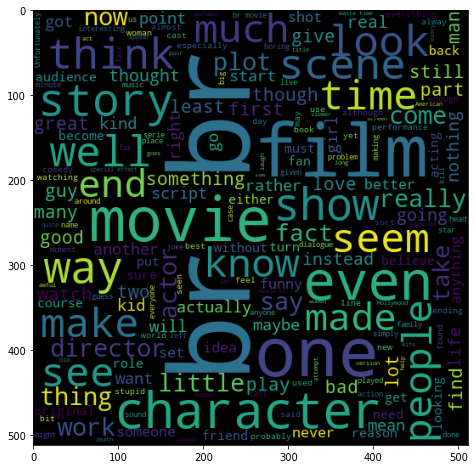

In [19]:
from wordcloud import WordCloud
pos = ' '.join(list(df[df['label'] == 1]['review']))
neg = ' '.join(list(df[df['label'] == 0]['review']))
pos_wc = WordCloud(width = 512, height = 512).generate(pos)
neg_wc = WordCloud(width = 512, height = 512).generate(neg)
plt.figure(figsize=(10,8))
plt.imshow(pos_wc)
plt.show()
plt.figure(figsize=(10,8))
plt.imshow(neg_wc)
plt.show()

# Initializing tfidf

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid1 = TfidfVectorizer(ngram_range = (1,2)) # 1-grams, 2-grams

# separating the data into features and labels

In [21]:
x = df['cleanedtext']
y = df['label']

# Applying tfidf

In [22]:
x = tfid1.fit_transform(x)

In [23]:
x.get_shape()

(49582, 2579569)

# Spliting the data into train and test

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

# Appyling and checking accuracy of Multinomial Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(x_train, y_train)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(x_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7422
           1       0.88      0.88      0.88      7453

    accuracy                           0.88     14875
   macro avg       0.88      0.88      0.88     14875
weighted avg       0.88      0.88      0.88     14875


Confusion Matrix:
 [[6530  892]
 [ 864 6589]]

Accuracy :  0.8819495798319328


# Appyling and checking accuracy of Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
pred = clf.predict(x_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.49      0.61      7422
           1       0.64      0.90      0.75      7453

    accuracy                           0.70     14875
   macro avg       0.74      0.69      0.68     14875
weighted avg       0.73      0.70      0.68     14875


Confusion Matrix:
 [[3619 3803]
 [ 733 6720]]

Accuracy :  0.6950588235294117
